In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
data=pd.read_csv(r"C:\Users\Rohit\Desktop\Rohit 2\project\snapdeal.csv")
data

,screen_name,created_at,text,in_reply_to_screen_name,retweeted_status_screen_name,user_description,source,lang,id
0,snapdeal,2021-07-05T03:34:43Z,Now is the perfect time to upgrade your fashio...,NaN,NaN,"Get Brand Waali Quality, Bazaar Waali Deal. FR...",Twitter Web App,en,1411891261724786688
1,snapdeal,2021-07-04T12:30:00Z,Pocket friendly deals now at your fingertips! ...,NaN,NaN,"Get Brand Waali Quality, Bazaar Waali Deal. FR...",Twitter Media Studio,en,1411663582685630465
2,snapdeal,2021-07-04T06:56:08Z,@anamikasingh172 Point toh sahi hai 🤭 Lekin ba...,anamikasingh172,NaN,"Get Brand Waali Quality, Bazaar Waali Deal. FR...",Twitter Web App,hi,1411579563809771521
3,snapdeal,2021-07-04T04:52:15Z,Enjoy the #ToofaniSale exclusively on the #Sna...,NaN,NaN,"Get Brand Waali Quality, Bazaar Waali Deal. FR...",Twitter Web App,en,1411548387229323269
4,snapdeal,2021-07-03T12:57:59Z,It's time to shop for the trendiest fashion ap...,NaN,NaN,"Get Brand Waali Quality, Bazaar Waali Deal. FR...",Twitter Web App,en,1411308236855136265
...,...,...,...,...,...,...,...,...,...
3190,snapdeal,2018-07-30T06:54:50Z,Every day 174 children go missing. A large num...,NaN,NaN,"Get Brand Waali Quality, Bazaar Waali Deal. FR...",Twitter Web Client,en,1023824218314686465
3191,snapdeal,2018-07-30T06:16:14Z,Imagine the plight of a girl who gets traffick...,NaN,NaN,"Get Brand Waali Quality, Bazaar Waali Deal. FR...",Twitter Web Client,en,1023814508274434048
3192,snapdeal,2018-07-30T06:13:05Z,RT @jazzhandsandco: I join and support @stc_in...,NaN,jazzhandsandco,"Get Brand Waali Quality, Bazaar Waali Deal. FR...",Twitter Web Client,en,1023813711566446593
3193,snapdeal,2018-07-30T05:56:43Z,RT @vivekoberoi: Kudos! A cause very close to ...,NaN,vivekoberoi,"Get Brand Waali Quality, Bazaar Waali Deal. FR...",Twitter Web Client,en,1023809594857009155


In [3]:
data.isnull().sum()

screen_name                        0
created_at                         0
text                               0
in_reply_to_screen_name         3052
retweeted_status_screen_name    3020
user_description                   0
source                             0
lang                              52
id                                 0
dtype: int64

In [4]:
data_1=data.copy()
data_1=data_1.drop(columns=["in_reply_to_screen_name","retweeted_status_screen_name"])

In [5]:
data_1["lang"].fillna("en",inplace=True)

In [6]:
data_1.isnull().sum()

screen_name         0
created_at          0
text                0
user_description    0
source              0
lang                0
id                  0
dtype: int64

In [7]:
data_1=pd.DataFrame(data_1.text)
data_1.head()

,text
0,Now is the perfect time to upgrade your fashio...
1,Pocket friendly deals now at your fingertips! ...
2,@anamikasingh172 Point toh sahi hai 🤭 Lekin ba...
3,Enjoy the #ToofaniSale exclusively on the #Sna...
4,It's time to shop for the trendiest fashion ap...


In [8]:
data_1.iloc[476,0]

"RT @1kunalbahl: 5pm on Sunday, March 22nd, the deafening sound of India's strength and unity will be heard across the world. https://t.co/nnObUaK9Tf"

In [9]:
data_1.text=data_1.text.str.lower()

In [10]:
data_1.iloc[476,0]

"rt @1kunalbahl: 5pm on sunday, march 22nd, the deafening sound of india's strength and unity will be heard across the world. https://t.co/nnobuak9tf"

In [11]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [12]:
def remove_punctuation(text):
    text_nopunt="".join([c for c in text if c not in string.punctuation])
    return text_nopunt

In [13]:
data_1['text']=data_1['text'].apply(lambda x : remove_punctuation(x))
data_1.iloc[476,0]

'rt 1kunalbahl 5pm on sunday march 22nd the deafening sound of indias strength and unity will be heard across the world httpstconnobuak9tf'

In [14]:
data_1['text'] = data_1['text'].str.replace(r'http\S+|www.\S+','',case=False)
data_1.iloc[476,0]

'rt 1kunalbahl 5pm on sunday march 22nd the deafening sound of indias strength and unity will be heard across the world '

In [15]:
data_1['text'] = data_1['text'].str.replace('\d+','')
data_1.iloc[476,0]

'rt kunalbahl pm on sunday march nd the deafening sound of indias strength and unity will be heard across the world '

In [16]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rohit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [17]:
data_1['text'] = data_1['text'].apply(lambda x: ' '.join([word for word in x.split() 
                                                      if word not in (stop)]))
data_1.iloc[476,0]

'rt kunalbahl pm sunday march nd deafening sound indias strength unity heard across world'

In [18]:
import re 
nltk.download('words')  
words = set(nltk.corpus.words.words())
words

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Rohit\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


{'offtake',
 'hyponymous',
 'obstructant',
 'unaware',
 'baronetship',
 'dacryocystotome',
 'costula',
 'dipterocecidium',
 'ecphore',
 'Thoracostraca',
 'pentaploidy',
 'crimination',
 'unscrupulosity',
 'heliast',
 'thunder',
 'yellowweed',
 'antrotympanitis',
 'caddow',
 'nematogone',
 'alveolonasal',
 'throbbingly',
 'tubulation',
 'decoherence',
 'intersterile',
 'saltarello',
 'throstle',
 'tolerablish',
 'fricassee',
 'trun',
 'aponeurology',
 'lunged',
 'Lombardeer',
 'pardonableness',
 'Lahontan',
 'cashierer',
 'dennet',
 'pulpitless',
 'pretermitter',
 'chump',
 'humbleness',
 'safflor',
 'vesperal',
 'wardency',
 'hexametric',
 'Cortinarius',
 'altiloquence',
 'transmigration',
 'dismantler',
 'Alces',
 'frat',
 'argyric',
 'rhombiform',
 'yate',
 'mermithergate',
 'nabk',
 'undelightsome',
 'gastroarthritis',
 'Pyramidalism',
 'dux',
 'fungology',
 'reptiloid',
 'narrawood',
 'aerodermectasia',
 'rescissible',
 'backfiller',
 'decidingly',
 'preprimitive',
 'democracy',
 '

In [19]:
data_1.iloc[476,0]

'rt kunalbahl pm sunday march nd deafening sound indias strength unity heard across world'

In [20]:
from nltk.stem import WordNetLemmatizer 
import nltk
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Rohit\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [21]:
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w,"v") for w in w_tokenizer.tokenize(text)]

In [22]:
data_1['text'] = data_1.text.apply(lambda x :' '.join(lemmatize_text(x)))
data_1.iloc[476,0]

'rt kunalbahl pm sunday march nd deafen sound indias strength unity hear across world'

In [23]:
data_1['text'] = (data_1['text'].astype("str").str.rstrip())
data_1.iloc[476,0]

'rt kunalbahl pm sunday march nd deafen sound indias strength unity hear across world'

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_1_cv = cv.fit_transform(data_1.text)
data_1_dtm = pd.DataFrame(data_1_cv.toarray(), columns=cv.get_feature_names())

tdm = data_1_dtm.transpose()
tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,3185,3186,3187,3188,3189,3190,3191,3192,3193,3194
aa,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
aagaye,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaj,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aakhir,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aap,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
tdm['freq'] = tdm.sum(axis=1)
tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,3186,3187,3188,3189,3190,3191,3192,3193,3194,freq
aa,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,3
aagaye,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
aaj,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
aakhir,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
aap,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15


In [26]:
tdm.reset_index(inplace=True)
tdm.head()

,index,0,1,2,3,4,5,6,7,8,...,3186,3187,3188,3189,3190,3191,3192,3193,3194,freq
0,aa,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,3
1,aagaye,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,aaj,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,aakhir,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,aap,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15


In [27]:
tdm1=tdm[["index","freq"]]
tdm1.rename(columns = {'index':'Word'}, inplace = True)
tdm1.sort_values(by='freq',ascending=False,inplace=True)
tdm1.head(15)

,Word,freq
208,awesomedeal,1025
2148,megadeals,985
3219,snapthedeal,658
3198,snapdeal,417
2498,perfect,264
425,buy,250
764,deal,218
2075,make,204
2146,megadeal,196
2029,look,176


In [28]:
import seaborn as sns
w = tdm1[tdm1['freq']>=200]
fg = sns.factorplot(x='Word', y='freq',
                   size=4, aspect=2,
                   kind= 'bar',
                   data_1=w)

In [29]:
text = " ".join(review for review in data_1.text)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 230427 words in the combination of all review.


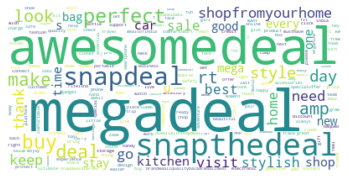

In [30]:

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white",
                      collocations=False).generate(text)


plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [31]:
import os
os.chdir(r"C:\Users\Rohit\Desktop\Rohit 2\project")

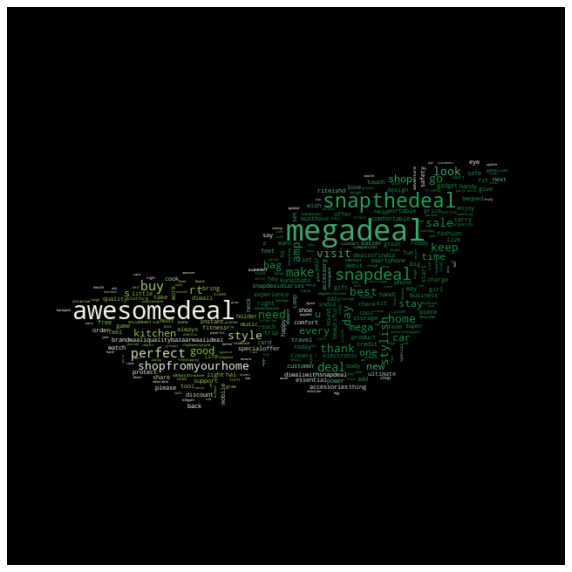

In [32]:

mask = np.array(Image.open("leaf.jpeg"))
wordcloud_full = WordCloud(stopwords=stopwords,background_color='black',
                           mode="RGBA",
                           max_words=30000,
                           mask=mask,
                           collocations=False).generate(text)


image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[10,15]) 
plt.imshow(wordcloud_full.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()

In [33]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
data_1['polarity'] = data_1['text'].apply(pol)
data_1.head(10)

,text,polarity
0,perfect time upgrade fashion wardrobe toofanis...,0.642857
1,pocket friendly deal fingertips enjoy toofani ...,0.425000
2,anamikasingh point toh sahi hai 🤭 lekin baaris...,0.000000
3,enjoy toofanisale exclusively snapdeal app dis...,0.400000
4,time shop trendiest fashion apparel officially...,0.500000
5,toofanisale finally along mindblowing deal pro...,0.000000
6,iss deal ki baarish mein bheegne ke liye ready...,0.200000
7,toofanisale paas aa raha hai aur iska saamna k...,0.000000
8,dher saari shop ke liye taiyaar ho jaiye kyuki...,0.000000
9,read find people buy last months pandemic snap...,0.000000


In [34]:
data_1['Sentiment'] = np.where(data_1['polarity']>=0, 'Positive', 'Negative')
data_1.head()

,text,polarity,Sentiment
0,perfect time upgrade fashion wardrobe toofanis...,0.642857,Positive
1,pocket friendly deal fingertips enjoy toofani ...,0.425000,Positive
2,anamikasingh point toh sahi hai 🤭 lekin baaris...,0.000000,Positive
3,enjoy toofanisale exclusively snapdeal app dis...,0.400000,Positive
4,time shop trendiest fashion apparel officially...,0.500000,Positive


In [35]:
data_1.Sentiment.value_counts()

Positive    3014
Negative     181
Name: Sentiment, dtype: int64

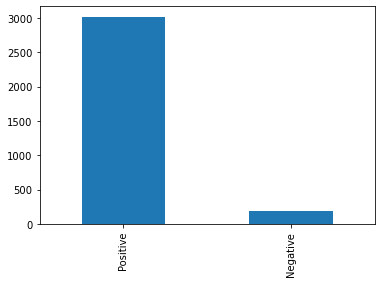

In [36]:
data_1.Sentiment.value_counts().plot.bar()